**Question 1a**

User will input which numbers they want to train the clasification on. 

In [ ]:
#importing necessary libraries
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()

Split up data based on user input into training and test sets

In [ ]:
def Initialize():
  number1 = input("Enter one number to between 0 and 9: ")
  number2 = input("Enter a second number to between 0 and 9: ")
  number1 = int(number1)
  number2 = int(number2)
  #Split Up Data
  x_train = digits.data
  size = len(x_train)
  y_actual = np.array(digits.target) 

  x_new_train = ([])
  y_new_train = ([])
  index_list_number1 = np.arange(start=number1, stop=size, step=10)
  index_list_number2 = np.arange(start=number2, stop=size, step=10)
  for i in range(size):
    if y_actual[i] in index_list_number1:
      x_new_train.append(x_train[i])
      y_new_train.append(y_actual[i])
    if y_actual[i] in index_list_number2:
      x_new_train.append(x_train[i])
      y_new_train.append(y_actual[i])

  #Split data into test and training set
  x_new_train = np.array(x_new_train)
  y_new_train = np.array(y_new_train)
  size_training = len(x_new_train)
  #test set
  x_new_test = x_new_train[size_training-61:]
  y_new_test = y_new_train[size_training-61:]
  #training set
  x_new_train = x_new_train[:size_training-61]
  y_new_train = y_new_train[:size_training-61]

  #map numbers to 1 or 0 for output
  if number1<number2:
    y_new_train[y_new_train == number1] = 0
    y_new_train[y_new_train == number2] = 1
  else:
    y_new_train[y_new_train == number2] = 0
    y_new_train[y_new_train == number1] = 1

  return [x_new_train,y_new_train,x_new_test,y_new_test,number1,number2]

Now to begin the gradient descent algorithm

Enter one number to between 0 and 9: 5
Enter a second number to between 0 and 9: 7


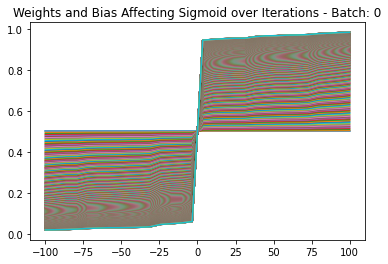

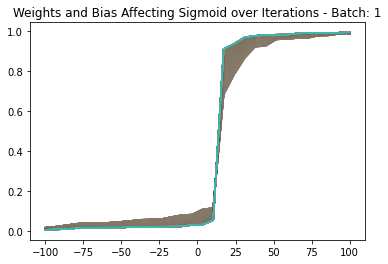

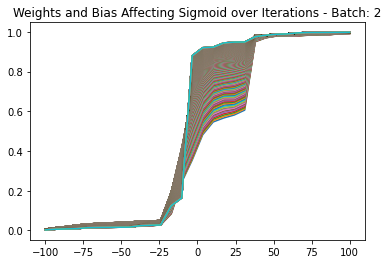

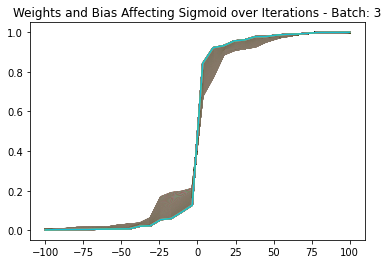

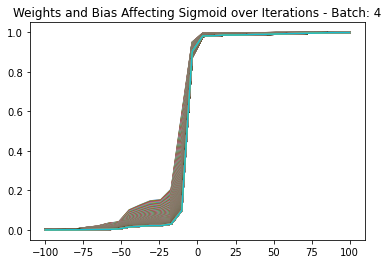

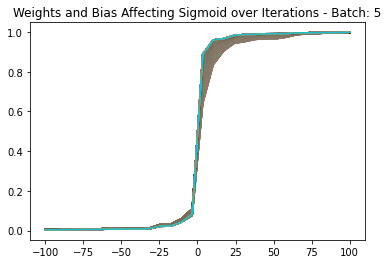

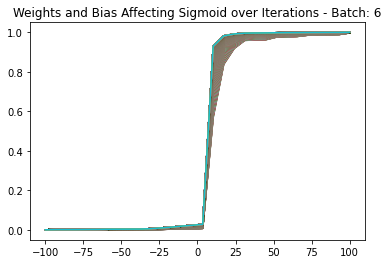

In [ ]:
test_train_sets = Initialize()
x_new_train = test_train_sets[0]
y_new_train = test_train_sets[1]
x_new_test = test_train_sets[2]
y_new_test = test_train_sets[3]
number1 = test_train_sets[4]
number2 = test_train_sets[5]

#Initialize Sigmoid 
def sigmoid(z):
  a = 1/(1+np.exp(-z))
  return a
#Loss and Cost Function using cross entropy loss
def loss(y_actual,a):
  loss = -y_actual * np.log(a) - (1-y_actual)*np.log(1-a)
  return loss
def cost(loss,m):
  cost = 1/m * sum(loss)
  return cost



#Gradient Descent Calculations
def GradientDescent(x_new_train,y_new_train,epochs,alpha,lambda_reg):
  #Initialize Weights
  features_sample = 64 #Constant size 64 vector for all images
  w = np.zeros((1,features_sample))
  w = w[0]
  b = 0

  #Specifying Batch Size
  rem = len(x_new_train)%10
  for z in range(rem):
    x_new_train = np.delete(x_new_train,z,axis=0)
    y_new_train = np.delete(y_new_train,z)
  x_batch_size = np.split(x_new_train,10)
  y_batch_size = np.split(y_new_train,10)
  loss_arr = ([])
  cost_arr = ([])
  weight_images = []
  #First Loop for Cycling through batches
  for j in range(len(x_batch_size)):
    m = len(x_batch_size[j])
    x_batch = x_batch_size[j]
    y_batch = y_batch_size[j]
    Q = np.identity(features_sample) #not used but left here just in case
    

  #Gradient Descent Loop For Each bacth
    plt.figure()
    for i in range(epochs):
      #Calculate the prediction z and a
      z = np.dot(w,x_batch.T)+b
      a = sigmoid(z) 

      #Print w's as images 
      max_elem = np.amax(w)
      if max_elem==0:
        max_elem = 1
      w_intermediate = w / max_elem
      w_rescaled = w_intermediate * 255
      img = w_rescaled.astype(np.uint8)
      reshaped_w = np.reshape(img,(8,8))
      reshape_3 = np.repeat(reshaped_w[:,:,np.newaxis],3,axis=2)
      if j == 0: #only append images for batch 0 for ease
        weight_images.append(reshape_3)

      #Plotting weights and bias of neuron over training (1st sample only)
      inputRange = np.linspace(-100,100,len(x_batch))
      sorted_a= np.sort(a)
      plt.title("Weights and Bias Affecting Sigmoid over Iterations - Batch: " + str(j))
      plt.plot(inputRange,sorted_a)

      #Loss
      sample_loss = loss(y_batch,a) 

      #Regularized Cost
      regularization = lambda_reg*np.linalg.norm(w)
      Cost = cost(sample_loss,m) + regularization
      cost_arr.append(Cost)

      #Calculate Gradients
      temp = a-y_batch
      dw = 1/m * np.dot(x_batch.T, temp.T) + 2*lambda_reg*w
      db = 1/m * np.sum(temp)

      #Perform Updates
      w = w - alpha*dw
      b = b - alpha*db

    #Plotting Cost Function over Iterations
  plt.figure()
  plt.title("Cost of Model over Time")
  plt.plot(range(10000),cost_arr)

  return w,b,weight_images

Parameters = GradientDescent(x_new_train,y_new_train,1000,0.0001,0.1)

Weight images over epochs for batch 0

In [ ]:
#Display 20 images of weights for batch 0 over time
weight_images = Parameters[2] 
fig = plt.figure(figsize=(8, 8))
fig.tight_layout()
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = weight_images[(i-1)*50]
    fig.add_subplot(rows, columns, i)
    plt.title('Epoch#' + str((i-1)*50))
    plt.axis('off')
    plt.imshow(img)
plt.show()

#Video Generation. Will not display on jupyter notebook. Mock code just available. 
import cv2
import numpy as np
frameSize = (8, 8)

out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, frameSize)

for i in range(len(weight_images)):
    img = weight_images[i]
    out.write(img)

out.release()

Now the Prediction 

In [ ]:
#Prediction
w = Parameters[0]
b = Parameters[1]
def Prediction(w,b):
  pred = np.dot(w,x_new_test.T)+b
  A = sigmoid(pred)
  final = []
  for i in range(len(A)): 
    if A[i] > 0.5:
      if number1<number2:
        final.append(number2)
      else:
        final.append(number1)
    else:
      if number1<number2:
        final.append(number1)
      else:
        final.append(number2)
  final = np.array(final)
  print(final)
  print(y_new_test)
  return final
final = Prediction(w,b)

Metrics

In [ ]:
#Report on model
def Report(final,y_new_test):
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import f1_score
  from sklearn.metrics import classification_report
  c = confusion_matrix(y_new_test,final)
  a = accuracy_score(y_new_test, final)
  r = recall_score(y_new_test, final, average=None)
  p = precision_score(y_new_test, final, average=None)
  f = f1_score(y_new_test, final, average=None)
  print("Confusion Matrix\n", c)
  print("\nReport\n",classification_report(y_new_test, final))
Report(final,y_new_test)

**Question 2**
Using sklearn since assignment allows use of libraries

In [ ]:
#Load up the same dataset as before

digits = load_digits()

#Data is split up using the same methodology as before. No need to write new code
test_train_sets = Initialize()
x_new_train = test_train_sets[0]
y_new_train = test_train_sets[1]
x_new_test = test_train_sets[2]
y_new_test = test_train_sets[3]
number1 = test_train_sets[4]
number2 = test_train_sets[5]

#Using sklearn from above
def usingLibraries(x_new_train,y_new_train,x_new_test,y_new_test,c):
  from sklearn import metrics 
  from sklearn.linear_model import LogisticRegression
  logistic_regression = LogisticRegression(C=c,max_iter=1000)
  logistic_regression.fit(x_new_train,y_new_train)
  y_pred = logistic_regression.predict(x_new_test)
  final = []
  for i in range(len(y_pred)): 
    if y_pred[i] > 0.5:
      if number1<number2:
        final.append(number2)
      else:
        final.append(number1)
    else:
      if number1<number2:
        final.append(number1)
      else:
        final.append(number2)
  Report(final,y_new_test)
#Lambda = 1000
print('\nLambda = 1000')
usingLibraries(x_new_train,y_new_train,x_new_test,y_new_test,0.001)
#Lambda = 1
print('\nLambda = 10')
usingLibraries(x_new_train,y_new_train,x_new_test,y_new_test,1)
#Lambda = 0.1
print('\nLambda = 0.1')
usingLibraries(x_new_train,y_new_train,x_new_test,y_new_test,10)
#Lambda = 0.001
print('\nLambda = 0.001')
usingLibraries(x_new_train,y_new_train,x_new_test,y_new_test,1000)